# Проект: Исследование стартапов

- Автор: Макарова Анастасия
- Дата: 04.03.2025

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

### Цели и задачи проекта

Подготовить датасет и проверить, что данные в нём соответствуют дествительности, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

### Содержание проекта

1. Введение.
2. Знакомство с данными: загрузка и первичная предобработка.
3. Предобработка данных, предварительное исследование.
4. Исследовательский анализ объединённых таблиц
5. Итоговый вывод и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* `acquisition.csv` - Содержит информацию о покупках одними компаниями других компаний;
* `company_and_rounds.csv` - Содержит информацию о компаниях и раундах финансирования;
* `people.csv` - Содержит информацию о сотрудниках;
* `education.csv` - Содержит информацию об образовании сотрудника;
* `degrees.csv` - Содержит информацию о типе образования сотрудника.

Опциональные датасеты:
* `fund.csv` - Содержит информацию о фондах;
* `investment.csv` - Содержит информацию о раундах инвестирования.

Таблица `acquisition` Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

Таблица `company_and_rounds`Содержит информацию о компаниях и раундах финансирования:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Таблица `education` Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Таблица `people` Содержит информацию о сотрудниках:
- `id`— идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

Таблица `degrees` Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Таблица `fund` Содержит информацию о фондах:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

Таблица `investment` Содержит информацию о раундах инвестирования:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: info и info_df и price_df.

In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Выгружаем данные основных таблиц в переменные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [5]:
# Выгружаем данные дополнительных таблиц в переменные
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Познакомимся с данными датасета `acquisition.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [6]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [7]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду snake case.
- Столбцы `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount`содержат числовые значения и хранятся в типах данных int64. Значения в столбцe term_code содержит текстовую информацию и имеет тип данных object, что тоже корректно. В столбце `acquired_at` содержиться дата сделки, формат object нужно поменять на datetime64.
- Пропуски содержатся только в двух столбцах `term_code` и `acquired_at`. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `company_and_rounds.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [8]:
# Выводим первые строки датафрейма на экран
company_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Выводим информацию о датафрейме
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбцa и 217 472 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов нужно привести к одному виду: snake case.
- company  ID - содержит целочисленные значения, можно привести к формату int. столбцы `founded  at`(дата инвестирования), `closed  at` (дата закрытия) - привести к типу datetime64. Столбцы `investment  rounds`, `funding  rounds`, `funding  total`, `milestones` содержат целочисленные значения, приведем их к формату int, вместо float64.
- Пропуски содержатся в 15 столбцах. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Приведем названия столбцов к одному виду: snake case. И проверим результат

In [10]:
company_df.columns = company_df.columns.str.replace("  ", "_")

In [11]:
company_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Также видим 2 одинаковых столбца в таблице company_ID и company_id, пока оставим как есть, возможно в них разная информация, поэтмоу пока не будем приводить их к одному виду.

Познакомимся с данными датасета people.csv — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [12]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [13]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов приведены к одному виду: snake case.
- В столбце `id` содержаться целочисленные значения, тип int корректный. Столбец `company_id` содержит целочисленные значения, но так как там содержаться пропуски тип данных - float64 корректный. Столбцы `network_username`, `last_name`, `first_name` содержат текстовую информацию тип данных `object` 
- Пропуски содержатся в 4 столбцах из 5.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета education.csv — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [14]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [15]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет education.csv содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудников.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов приведены к одному виду: snake case.
- В столбцах `id` и `person_id`содержатся целочисленные значения, тип int корректный. Столбец `instituition` содержит текстовую информацию тип данных object корректный. Cтолбец `graduated_at` (дата получения образования) - перевести к типу datetime64.
- Пропуски содержатся в 2 столбцах из 4. Верояно, у тех сотрудников, столбец с образование не заполнен - либо нет высшего образования или средне-специального образования, либо утеряны документы о получении, и нет возможности воостановить дату образования.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета degrees.csv — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [16]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [17]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образовании сотрудников.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов приведены к одному виду: snake case.
- В столбцах id содержатся целочисленные значения, тип int корректный. Столбец object_id (идентификатор сотрудника) содержит текстовые симводы p: - их следует удалить и оставить только числа, далее привести тип столбца к int.Столбцы degree_type и subject содержат текстовыую информацию, тип object указан корректно.
- Пропуски содержатся в 2 столбцах из 4. Верояно, пропуски у тех сотрудников,где либо нет высшего образования, либо утеряны документы о получении, и нет возможности воостановить тип образования.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Удалим текстовые симводы из столбца object_id. И выведем значения этого столбца.

In [18]:
degrees_df['object_id'] = degrees_df['object_id'].str.replace("p:", "")

In [19]:
degrees_df['object_id']

0           6117
1           6136
2           6136
3           6005
4           5832
           ...  
109605    268589
109606    268527
109607    268527
109608    268528
109609    268528
Name: object_id, Length: 109610, dtype: object

**Вывод:** 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Привели названия столбцов к одному виду в таблице `company_df`. Теперь во всех таблицах названия в столбцах в одном стиле.
- Удалили лишние симводы в столбце `object_id` таблицы `degrees_df`, оставили только числовую информацию.
- Определили, что стоблцы содержащие дату нужно привести к типу datetime64: `acquired_at` в таблице `acquisition_df`, столбцы `founded_at`, `closed_at` в таблице `company_df`, `graduated_at` в таблице `education_df`.
- Определили,что столбец `object_id` в таблице `degrees_df`нужно перевести к формату int.
- Определили,что в каждой таблице содержатся пропуски.
    
    

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Обработаем типы данных в столбцах. Стоблбцы содержащие дату приведем к типу datetime64: `acquired_at` в таблице `acquisition_df`, столбцы `founded_at`, `closed_at` в таблице `company_df`, `graduated_at` в таблице `education_df`

In [20]:
# Меняем тип данных в столбце 'acquired_at'
acquisition_df['acquired_at']=acquisition_df['acquired_at'].astype('datetime64')

In [21]:
# проверим результат преобразования
acquisition_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [22]:
# Меняем тип данных в столбце founded_at
company_df['founded_at']=company_df['founded_at'].astype('datetime64')

In [23]:
# Меняем тип данных в столбце closed_at
company_df['closed_at']=company_df['closed_at'].astype('datetime64')

In [24]:
# Меняем тип данных в столбце closed_at
company_df['funded_at']=company_df['funded_at'].astype('datetime64')

In [26]:
# Меняем тип данных в столбце graduated_at
education_df['graduated_at']=education_df['graduated_at'].astype('datetime64')

In [27]:
# проверим результат преобразования
acquisition_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [28]:
# Меняем тип данных в столбце object_id
degrees_df['object_id']=degrees_df['object_id'].astype('int')

In [29]:
# проверим результат преобразования
degrees_df.dtypes

id              int64
object_id       int64
degree_type    object
subject        object
dtype: object

acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

Проанализируем пропуски в таблице `acquisition_df`

In [30]:
# Проанализируем пропуски
missing = (pd.DataFrame({'Кол-во пропусков': acquisition_df.isnull().sum().sort_values(ascending=False), 'Доля пропусков': acquisition_df.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
term_code,7576,0.805400
acquired_at,29,0.003100
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


Пропуски содержаться в столбцах: term_code — варианты расчёта, acquired_at — дата сделки. Видимо при сделке, была потеряна информация о варианте расчета и дате сдлеки. Эта информация не повляет на ход нашего исследования. 

Проанализируем пропуски в таблице  `company_df`

In [31]:
# Проанализируем пропуски
missing = (pd.DataFrame({'Кол-во пропусков': company_df.isnull().sum().sort_values(ascending=False), 'Доля пропусков': company_df.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
closed_at,214325,0.984200
funded_at,165094,0.758100
is_last_round,164846,0.757000
is_first_round,164846,0.757000
participants,164846,0.757000
pre_money_valuation,164846,0.757000
raised_amount,164846,0.757000
funding_round_type,164846,0.757000
funding_round_id,164846,0.757000
company_id,164846,0.757000


В каждом столбце таблицы есть пропуски. Даже в столбцах company_id, хотя в этих столбцах поидее не должно быть пропусков или ни должны быть в меньшем колличестве. 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Информация о пропусках в абсолютных и относительных значениях выведена, молодец

 
       
    
<div class="alert alert-warning">
 

Совет 🤔:
    
    
     
    
- Немножко теории о пропусках и как мы можем с ними работать, можешь почитать [тут](https://loginom.ru/blog/missing)    
    

    
- Можно визуализировать пропуски с помощью библиотеки [missingno](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/), выглядит красиво
    
А главное мы поймём структуру пропусков в company_and_rounds, а это важно для последнего раздела первой части. Посоветовал бы использовать  msno.matrix(),  и там бы мы увидели кластеры пропусков.   Это   мощная подсказкой для  последнего раздела первой части    
    
    
Также у missingno есть дополнительный функционал

    msno.heatmap(df)

Так можно посмотреть на корреляцию между пропусками в разных столбцах, это может подсказать как образовались многие наши пропуски

 

Проанализируем пропуски в таблице  `people_df`

In [32]:
# Проанализируем пропуски
missing = (pd.DataFrame({'Кол-во пропусков': people_df.isnull().sum().sort_values(ascending=False), 'Доля пропусков': people_df.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
company_id,192094,0.847300
first_name,5,0.000000
id,0,0.000000
last_name,1,0.000000
network_username,187842,0.828600


Больше всего пропусков в столбцах:
company_id (идентификатор компании) - 84%.
network_username (ник в социальных сетях) - 82%, впринципе у нас есть таблица с даными о компании, можно их обьединить и посмотреть информацию о сотрудниках, поэтому эти пропуски можно оставить.

Проанализируем пропуски в таблице education_df

In [33]:
# Проанализируем пропуски
missing = (pd.DataFrame({'Кол-во пропусков':education_df.isnull().sum().sort_values(ascending=False), 'Доля пропусков': education_df.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
graduated_at,51556,0.470400
instituition,55,0.000500
id,0,0.000000
person_id,0,0.000000


Больше всего пропусков в столбце graduated_at (дата получения образования) 47 %— вероятно из за потери данных, а также в столбце instituition (название учебного заведения) - 0,05% - видимо есть сотрудники,у кого нет информации об образовании или нет образования.

Проанализируем пропуски в таблице degrees_df

In [34]:
# Проанализируем пропуски
missing = (pd.DataFrame({'Кол-во пропусков':degrees_df.isnull().sum().sort_values(ascending=False), 'Доля пропусков': degrees_df.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
subject,28312,0.258300
degree_type,11218,0.102300
id,0,0.000000
object_id,0,0.000000


Попуски в столбцах degree_type (тип образования) 10% и subject (специальность) 25%. Можно считать это не критичным, так как в больше половины данных об образовании присутствует.

**Вывод:**
- В столбцах `acquired_at` в таблице `acquisition_df`, столбцы `founded_at`, `closed_at` в таблице `company_df`, `graduated_at` в таблице `education_df` поменяли тип данных с object на datetime64.
- Проверили пропуски в таблицах. Больше всего пропусков в таблице  company_df - В каждом столбце есть пропуски. 
- Проанализировали пропуски, данной информации достаточно для решения задачь.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.



In [35]:
# С помощью акцессора `dt` создаём новый столбец вида YYYY
company_df['funded_year']=company_df['funded_at'].dt.to_period('Y')

In [36]:
# Проверим результат добавления новго столбца
company_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Составим сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года указан:

- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.

Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [37]:
pivot = company_df.pivot_table(
    values=['raised_amount', 'funding_round_type'],  # Указываем столбцы
    index='funded_year',                             # Группируем по году
    aggfunc={'raised_amount': 'median', 'funding_round_type': 'count'}
)

# Фильтруем таблицу по условию: информация о более чем 50 раундах финансирования
filtered_pivot = pivot[pivot['funding_round_type'] > 50]
# Выводим результат
display(filtered_pivot)

,funding_round_type,raised_amount
funded_year,,
1999,76,2000000.0
2000,125,4200000.0
2001,96,3000000.0
2002,116,4200000.0
2003,159,3000000.0
2004,291,5000000.0
2005,1633,5500000.0
2006,2436,5000000.0
2007,3279,3973320.0


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

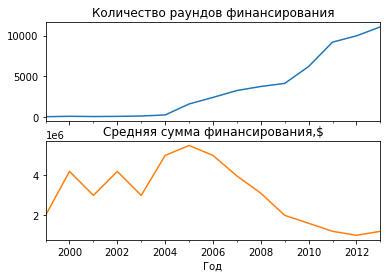

In [38]:
# Строим график
filtered_pivot.plot(kind='line',
            subplots=True,
            sharex=True,
            sharey=False,
            legend=False,
            title=['Количество раундов финансирования', 'Средняя сумма финансирования,$'])

# Подписываем оси
plt.xlabel('Год')
plt.show()

**Вывод:** 
- В 2005 году типичный размер собранных в рамках одного раунда средств был максимальным.
- В 2013 году количество раундов растет, а выделяемые в рамках каждого раунда средства снижаются. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Посмотрим, какое количество сотрудников в представленных компаниях

In [39]:
people_df_group=people_df.groupby('company_id')['id'].nunique().sort_values(ascending=False)
people_df_group

company_id
59.0        244
29.0        150
1242.0      138
231067.0     72
499.0        63
           ... 
63585.0       1
7258.0        1
63581.0       1
63580.0       1
70884.0       1
Name: id, Length: 22922, dtype: int64

Построим график распределения количества человек в компаниях.

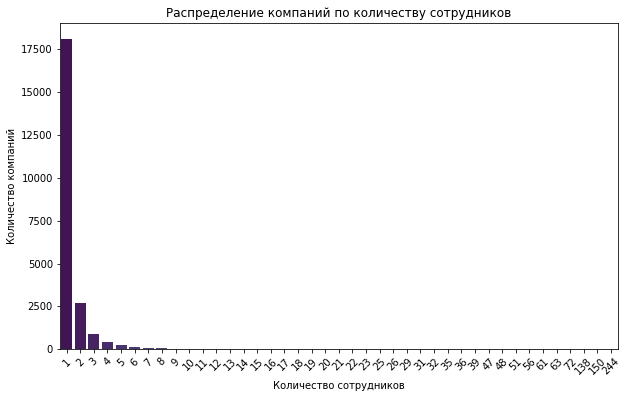

In [40]:
# Группируем данные по company_id и считаем количество уникальных id (сотрудников)
people_df_group = people_df.groupby('company_id')['id'].nunique().reset_index()
people_df_group.columns = ['company_id', 'employee_count']

# Строим countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='employee_count', data=people_df_group,palette='viridis')
plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.xticks(rotation=45)  # Поворот подписей на оси X для удобства
plt.show()

Таким образом, видно, что большинство компаний с колличеством 1 человек. Поэтому, разделим компании на такие категории, что бы в каждой было примернр одинаковое колличество человек:

In [41]:
# Определение интервалов и меток
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

# Создание столбца с группами
people_df_group['employee_group'] = pd.cut(people_df_group['employee_count'], bins=bins, labels=labels)

# Объединяем результат с исходным DataFrame people_df
people_df = people_df.merge(people_df_group[['company_id', 'employee_group']], on='company_id', how='left')

# Проверка результата
people_df.head()

,id,first_name,last_name,company_id,network_username,employee_group
0,10,Mark,Zuckerberg,5.0,NaN,26+
1,100,Peter,Lester,27.0,NaN,6-10
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3
3,10000,Neil,Capel,2526.0,NaN,2
4,100000,Sue,Pilsch,NaN,NaN,NaN


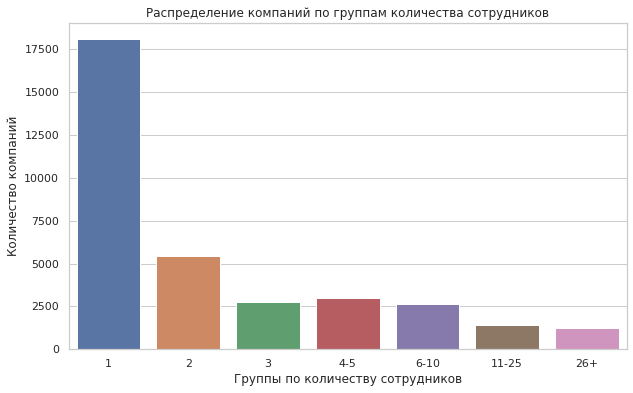

In [42]:
# Настройка стиля
sns.set(style="whitegrid")

# Построение countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='employee_group', data=people_df, order=labels)
plt.title('Распределение компаний по группам количества сотрудников')
plt.xlabel('Группы по количеству сотрудников')
plt.ylabel('Количество компаний')
plt.show()

In [43]:
people_df.groupby('employee_group')['id'].nunique().sort_values(ascending=False)

employee_group
1        18116
2         5418
4-5       2985
3         2763
6-10      2664
11-25     1425
26+       1243
Name: id, dtype: int64

Таким образом удалось удалось разделить сотрудников на группы, в которых примерно одинаковое колличество сотрудников.

In [44]:
# выводим результат
people_df.head()

,id,first_name,last_name,company_id,network_username,employee_group
0,10,Mark,Zuckerberg,5.0,NaN,26+
1,100,Peter,Lester,27.0,NaN,6-10
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3
3,10000,Neil,Capel,2526.0,NaN,2
4,100000,Sue,Pilsch,NaN,NaN,NaN


Объединим данные двух датасетов people_df и education_df в один. Так как нам нужны данные в основном из датасета people_df, так как нам нужна информация о категориях компаний, оставим левое присоединение, что бы все данные по нему сохранились и добавились имеющиеся данные из датасета education_df. Если мы будем использвоать 'inner' - потеряем большое количество данных.

In [45]:
# Соединяем данные в единый датафрейм df
education_people_df = people_df.merge(education_df, left_on='id',right_on= 'person_id', how='left')

In [46]:
education_people_df.head()

,id_x,first_name,last_name,company_id,network_username,employee_group,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,26+,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,6-10,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,2,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [47]:
# Выводим информацию о датафрейме
education_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   employee_group    44789 non-null   category      
 6   id_y              109056 non-null  float64       
 7   person_id         109056 non-null  float64       
 8   instituition      109002 non-null  object        
 9   graduated_at      57691 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.7+ MB


оценим среднюю долю сотрудников без информации об образовании по группам. 

Рассмотрим группу "1".

In [48]:
# отфильтруем данные по группе 1
df_1 = education_people_df.loc[(education_people_df['employee_group']=='1')]

В столбце `instituition` меньше всего пропусков - 0,05%, а в столбце `graduated_at` - 47%. Поэтому будем считать, что если в столбце `instituition` есть какая-то информация, то у сотрудника есть информация об образовании.

In [49]:
# оставим строки без пропусков в образовании
filtr_1_df=df_1[~df_1 ['instituition'].isna()]

In [50]:
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_1), len(filtr_1_df)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 23292 
 Осталось строк в датасете после исключения пропусков 14897 
 Строк без информации об образовании 8395 
 Процент строк без информации об образовании 36.04


Оценим среднюю долю сотрудников без информации об образовании в группе малое предприятие.

In [51]:
# отфильтруем данные по группе 2 
df_2 = education_people_df.loc[(education_people_df['employee_group']=='2')]

In [52]:
# оставим строки без пропусков в образовании
filtr_2_df=df_2[~df_2['instituition'].isna()]

In [53]:
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_2), len(filtr_2_df)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 6924 
 Осталось строк в датасете после исключения пропусков 4394 
 Строк без информации об образовании 2530 
 Процент строк без информации об образовании 36.54


Оценим среднюю долю сотрудников без информации об образовании в группе 3

In [54]:
# отфильтруем данные по группе 3
df_3=education_people_df.loc[(education_people_df['employee_group']=='3')]

In [55]:
# оставим строки без пропусков в образовании
filtr_df_3=df_3[~df_3['instituition'].isna()]

In [56]:
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_3), len(filtr_df_3)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 3588 
 Осталось строк в датасете после исключения пропусков 2240 
 Строк без информации об образовании 1348 
 Процент строк без информации об образовании 37.57


Оценим среднюю долю сотрудников без информации по группе '4-5'

In [57]:
# отфильтруем данные по группе '4-5'
df_4_5=education_people_df.loc[(education_people_df['employee_group']=='4-5')]

In [58]:
# оставим строки без пропусков в образовании
filtr_df_4_5=df_4_5[~df_4_5['instituition'].isna()]

In [59]:
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_4_5), len(filtr_df_4_5)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 3804 
 Осталось строк в датасете после исключения пропусков 2312 
 Строк без информации об образовании 1492 
 Процент строк без информации об образовании 39.22


Оценим среднюю долю сотрудников без информации по группе '6-10'

In [60]:
# отфильтруем данные по группе '4-5'
df_6_10=education_people_df.loc[(education_people_df['employee_group']=='6-10')]
# оставим строки без пропусков в образовании
filtr_df_6_10=df_6_10[~df_6_10['instituition'].isna()]
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_6_10), len(filtr_df_6_10)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 3409 
 Осталось строк в датасете после исключения пропусков 1985 
 Строк без информации об образовании 1424 
 Процент строк без информации об образовании 41.77


Оценим среднюю долю сотрудников без информации по группе '11-25'

In [61]:
# отфильтруем данные по группе '11-25'
df_11_25=education_people_df.loc[(education_people_df['employee_group']=='11-25')]
# оставим строки без пропусков в образовании
filtr_df_11_25=df_11_25[~df_11_25['instituition'].isna()]
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_11_25), len(filtr_df_11_25)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 1950 
 Осталось строк в датасете после исключения пропусков 1299 
 Строк без информации об образовании 651 
 Процент строк без информации об образовании 33.38


Оценим среднюю долю сотрудников без информации по группе '26+'

In [62]:
# отфильтруем данные по группе '26+'
df_26=education_people_df.loc[(education_people_df['employee_group']=='26+')]
# оставим строки без пропусков в образовании
filtr_df_26=df_26[~df_26['instituition'].isna()]
# Проверим сколько сотрудников без информации об образовании
a, b = len(df_26), len(filtr_df_26)
print( "Изначальное количество строк", a,
      '\n', "Осталось строк в датасете после исключения пропусков", b,
      '\n', "Строк без информации об образовании", a-b,
      '\n', "Процент строк без информации об образовании", round((a-b)/a*100, 2))

Изначальное количество строк 1822 
 Осталось строк в датасете после исключения пропусков 1482 
 Строк без информации об образовании 340 
 Процент строк без информации об образовании 18.66


**Вывод:**
- В группе "1"- 36,04% сотрудников без информации об образовании. Колличество компаний в группе - 18 116.
- В группе "2" - 36,54% сотрудников без информации об образовании. Колличество компаний в группе - 5418.
- В группе "3"- 37,57% сотрудников без информации об образовании. Колличество компаний в группе - 2985.
- В группе "4-5"- 39,22% сотрудников без информации об образовании. Колличество компаний в группе - 2763.
- В группе "6-10"- 41,77% сотрудников без информации об образовании. Колличество компаний в группе - 2664.
- В группе "11-25"-33,38% сотрудников без информации об образовании. Колличество компаний в группе - 1425.
- В группе "26+"- 18,66% сотрудников без информации об образовании. Колличество компаний в группе - 1243.

Поэтому можно сделать вывод,что в группах, по категориям предприятий отсутствует меньше половины информации, это значит,что ее достаточно для анализа. Так же видно, что по каждой группе процент почти одинокоый. Единственное в группе 26+ процент чуть ниже, так как там чуть меньше количество компаний в группе.

Также для выполнения задания можно было бы присоединить к этим ещё и таблицу degrees.csv, так как там также содердится информация об образовании. Обьединить таблицы можно было бы по столбцу `object_id`.



### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречаеться в таблицах `people`, `company_and_rounds` и дополнительной таблице `fund`.

Проверим дублируется ли информация с такими названиями в датасетах

In [63]:
people_df.duplicated(subset=['network_username']).sum()

188287

In [64]:
company_df.duplicated(subset=['network_username']).sum()

138202

In [65]:
fund_df.duplicated(subset=['network_username']).sum()

9553

Поробуем ответить на вопрос чтобы мы получили если бы попытались объединить people_df и company_rounds. Сколько бы мы получили дополнительной информации от этого обьединения.Создадим визуализацию, для демонстрации пересечения данных. Сделаем это с помощью диаграммы Венна

In [66]:
# Уникальные значения в каждом датасете
unique_users1 = set(people_df['network_username'].dropna().unique())
unique_users2 = set(company_df['network_username'].dropna().unique())
unique_users3 = set(fund_df['network_username'].dropna().unique())

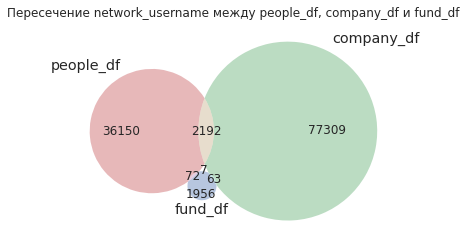

In [67]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Построение диаграммы Венна для трёх датасетов
venn3([unique_users1, unique_users2, unique_users3], set_labels=('people_df', 'company_df', 'fund_df'))
plt.title('Пересечение network_username между people_df, company_df и fund_df')
plt.show()

Визуализация пересечений с помощью диаграмм Венна

С помощью диаграмм Венна можно наглядно проанализировать пересечения и уникальные значения в датасетах. Это помогает понять, насколько данные связаны между собой, и сделать выводы о их структуре.Пересечение между датасетом people_df и company_df есть - 2192 пересечение. Связь между датасетом people_df и fund_df очень мальнькая 72 пересечения и связь между company_df и fund_df тоже незгачительная - 63 пересечения. Можно сделать вывод,что даные связаны между собой не сильно, при их соединении будет много пропусков.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Загрузим данные из файла company_and_rounds.csv и изучим их структуру

In [68]:
company_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Из таблицы видно, что она как будто образована из двух таблиц: таблица с данными о компаниях, таблица с данными о раундах инвистирования. Так как вначале идет столбец company_ID, в середине таблицы столбец 'funding_round_id' и далее за ним еще раз повторяеться столбец company_id. 

Для удобства анализа можно:
Создать отдельную таблицу с уникальными компаниями.
Создать отдельную таблицу с раундами финансирования, связанную с компаниями по company_id

In [69]:
# Создание таблицы с уникальными компаниями
companies = company_df[['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].drop_duplicates()

# Создание таблицы с раундами финансирования
rounds = company_df[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round']]


In [70]:
# выведем данные таблицы по компаниям
companies.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


In [71]:
# Выводим информацию о датафрейме
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [72]:
# скопируем датасет
companies_info=companies.copy()

Произведем обработку данных в данном датасете. Для начала приведем столбец company_ID к нижнему регистру.

In [73]:
companies_info.columns = companies_info.columns.str.lower()

In [74]:
# Проанализируем пропуски
missing = (pd.DataFrame({'Кол-во пропусков': companies_info.isnull().sum().sort_values(ascending=False), 'Доля пропусков': companies_info.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
closed_at,193934,0.986700
network_username,115963,0.590000
country_code,108564,0.552300
founded_at,105327,0.535900
category_code,73368,0.373300
domain,70009,0.356200
company_id,1,0.000000
name,1,0.000000
status,1,0.000000
investment_rounds,1,0.000000


Самое большое количество пропусков в столбце `closed_at` (дата закрытия компании) 98% - здесь, вероятно, если информация не указана, компания в статусе действующая. 
В столбце `network_username` (ник компании в сети) 59% пропусков - пропуски связаны с тем, что у компании может не быть ника в сети (нет сайта, не зарегистрированы в мессенджерах), тоже самое `domain` (официальный сайт компании) -35% пропусков.
Также есть 1 пропуск в столбце `company_id` - его мы удалим, так как без названия компании, нельзя провести ее анализ.
В остальных столбцах пропуски связаны с тем, что вероятно нет даннных и информайии по компании: `country_code` (код страны компании) 55% пропусков , `founded_at`c(дата инвестирования) - 53%, `category_code` 55% пропусков (категория области деятельности компании). 

Удалим строку с пропуском данных в столбце 'company_id', так как без информации о компании,мв не сможем провести анализ

In [75]:
# Отбираем строки без пропусков в столбце 'company_id'
companies_info=companies_info.dropna(subset = ['company_id'])

In [76]:
# проверим на явные дубликаты:
duplicated_companies_info = companies_info.duplicated().sum()
duplicated_companies_info

0

В датафрейме не найдено явных дубликатов. однако проверим дубликаты по названию компании и нику компании в сети.

In [77]:
companies_info.duplicated(subset=['name']).sum()

47

В датафрейме найдено 43 дубликата по названию компании и ника компании в сети. Их мы удалим, что бы не дублировалась информация о компаниях.

In [78]:
companies_info=companies_info.drop_duplicates(subset=['name'])

In [79]:
missing = (pd.DataFrame({'Кол-во пропусков': companies_info.isnull().sum().sort_values(ascending=False), 'Доля пропусков': companies_info.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
closed_at,193886,0.986700
network_username,115920,0.589900
country_code,108521,0.552300
founded_at,105286,0.535800
category_code,73331,0.373200
domain,69974,0.356100
company_id,0,0.000000
name,0,0.000000
status,0,0.000000
investment_rounds,0,0.000000


In [80]:
# Проверим сколько удалено строк датасета
a, b = len(companies), len(companies_info)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 196554 
 Осталось строк в датасете после обработки 196506 
 Удалено строк в датасете после обработки 48 
 Процент потерь 0.02


In [81]:
# выведем данные таблицы по раундам инвистирования
rounds.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Выводим информацию о датафрейме
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [83]:
missing = (pd.DataFrame({'Кол-во пропусков': rounds.isnull().sum().sort_values(ascending=False), 'Доля пропусков': rounds.isnull().mean().round(4).sort_values(ascending=False)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
funded_at,165094,0.758100
funding_round_id,164846,0.757000
company_id,164846,0.757000
funding_round_type,164846,0.757000
raised_amount,164846,0.757000
pre_money_valuation,164846,0.757000
participants,164846,0.757000
is_first_round,164846,0.757000
is_last_round,164846,0.757000


In [84]:
# скопируем датасет
rounds_info=rounds.copy()

Видим,что в таблице имеються пустые строки, они образовались, при обьединении этой таблицы с данными о компании. Их мы просто удалим, так как они будут мешать при анализе.

In [85]:
rounds_info=rounds_info.dropna(subset = ['funding_round_id'])

In [86]:
# проверим датасет на дубликаты
duplicated_rounds_info = rounds_info.duplicated().sum()
duplicated_companies_info

0

В таблице не обнаружено явных дубликатов.

In [87]:
# Проверим сколько удалено строк датасета
a, b = len(rounds), len(rounds_info)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 217774 
 Осталось строк в датасете после обработки 52928 
 Удалено строк в датасете после обработки 164846 
 Процент потерь 75.7


**Вывод:**

- Выяснили,что датасет `company_and_rounds.csv` получен путем слияния двух таблиц с данными о компаниях и с раундами инфистировани. Разделили его на 2 таблицы: `rounds_info` - информация о раундах, `companies_info` - информация о компаниях.
- провели обработку таблицы `companies_info`: привели названия стоблбцов к нижнему регистру, удалили 1 строку с пропуском в столбце `company_id`, выявли дубликаты по названию компаний - 47 шт и удалили, что бы не дублировать информацию при анализе. В результате таблице осталось 52928 строк, удалено 48 строк, процент потерь 0,02%.
- провели обработку таблицы `rounds_info`: удалили пустые строки (164846 строка), дубликаты были не выявлены. В таблице осталось  52928 строк.


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

аблица acquisition Содержит информацию о покупках одними компаниями других компаний:

id — идентификатор покупки.
acquiring_company_id — идентификатор покупающей компании.
acquired_company_id — идентификатор покупаемой компании.
term_code — варианты расчёта.
price_amount — сумма сделки.
acquired_at — дата сделки.

Отфильтруем компании, которые:
Имеют значения funding_rounds или investment_rounds больше нуля.
Или имеют статус acquired.

In [88]:
filtered_companies = companies_info[
    (companies_info['funding_rounds'] > 0) |
    (companies_info['investment_rounds'] > 0) |
    (companies_info['status'] == 'acquired')
]

# Проверка количества строк
print(f"Количество отфильтрованных компаний: {len(filtered_companies)}")

Количество отфильтрованных компаний: 40745


  Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании, т.е. клмпании которые продавались. Эти данные сожержаться в таблице `acquisition` (информация о покупках одними компаниями других компаний). Обьедин эти таблицы по столбцу `acquired_company_id`. Так как нам нужны данные компаний в основном из датасета `filtered_companies`, оставим левое присоединение, что бы все данные по нему сохранились и добавились имеющиеся данные из датасета `acquisition`. 

In [89]:
acquisition_companies_df = filtered_companies.merge(acquisition_df, left_on='company_id',right_on= 'acquired_company_id', how='left')

In [90]:
acquisition_companies_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.0,2005-05-29
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30


In [91]:
acquisition_companies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40888 entries, 0 to 40887
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40888 non-null  float64       
 1   name                  40888 non-null  object        
 2   category_code         35435 non-null  object        
 3   status                40888 non-null  object        
 4   founded_at            27910 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35882 non-null  object        
 7   network_username      20937 non-null  object        
 8   country_code          34857 non-null  object        
 9   investment_rounds     40888 non-null  float64       
 10  funding_rounds        40888 non-null  float64       
 11  funding_total         40888 non-null  float64       
 12  milestones            40888 non-null  float64       
 13  id              

Проверим, что в отфильтрованных данных нет пропусков в ключевых столбцах:

In [92]:
acquisition_companies_df.isnull().sum().sort_values(ascending=False)

term_code               39058
closed_at               38760
acquired_at             31527
id                      31498
price_amount            31498
acquired_company_id     31498
acquiring_company_id    31498
network_username        19951
founded_at              12978
country_code             6031
category_code            5453
domain                   5006
company_id                  0
milestones                  0
funding_total               0
funding_rounds              0
name                        0
status                      0
investment_rounds           0
dtype: int64

Видим, что в ключевых столбцах, таких как `company_id`, `name`, `investment rounds` (число инвестиционных раундов),`funding rounds` (число раундов финансирования), `funding total` (сумма финансирования).

In [93]:
# проверим на явные дубликаты
acquisition_companies_df.duplicated().sum()

0

Явных дубликатов нет.

In [94]:
# проверим на дубликаты по столбцу company_id
acquisition_companies_df.duplicated(subset=['company_id']).sum()

143

In [95]:
# удалим дубликаты 
acquisition_companies_df=acquisition_companies_df.drop_duplicates(subset=['company_id'])
len(acquisition_companies_df)

40745

In [96]:
# Проверка диапазона значений
print("Минимальные и максимальные значения:")
print(acquisition_companies_df[['funding_rounds', 'investment_rounds','funding_total','price_amount']].agg(['min', 'max']))

Минимальные и максимальные значения:
     funding_rounds  investment_rounds  funding_total  price_amount
min             0.0                0.0   0.000000e+00  0.000000e+00
max            15.0              478.0   5.700000e+09  3.900000e+10


Значения `funding_rounds`, `investment_rounds`,`funding_total`,`price_amount` неотрицательные и находятся в допустимом диапазоне.

Построим гистограммы распределения числовых столбцов: `funding_rounds`, `investment_rounds`,`funding_total`,`price_amount`.

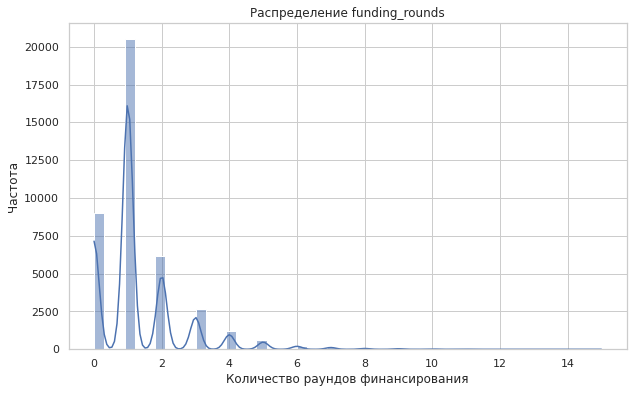

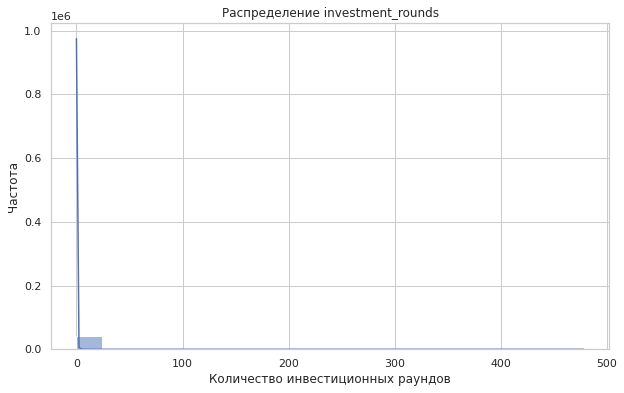

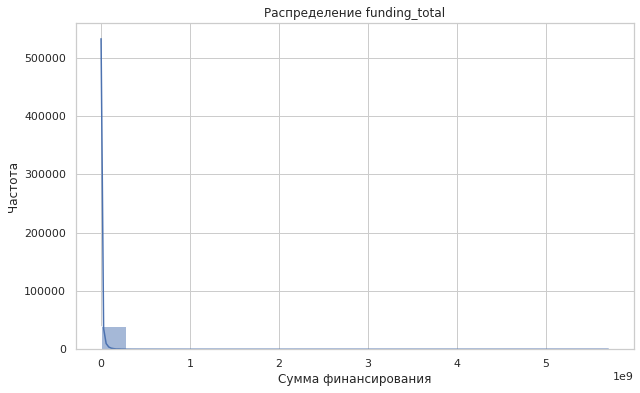

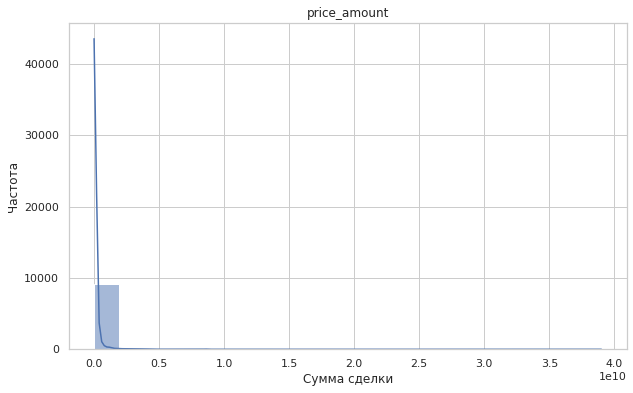

In [97]:
# Гистограмма для funding_rounds
plt.figure(figsize=(10, 6))
sns.histplot(acquisition_companies_df['funding_rounds'], bins=50, kde=True)
plt.title('Распределение funding_rounds')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Частота')
plt.show()

# Гистограмма для investment_rounds
plt.figure(figsize=(10, 6))
sns.histplot(acquisition_companies_df['investment_rounds'], bins=20, kde=True)
plt.title('Распределение investment_rounds')
plt.xlabel('Количество инвестиционных раундов')
plt.ylabel('Частота')
plt.show()

# Гистограмма для funding_total
plt.figure(figsize=(10, 6))
sns.histplot(acquisition_companies_df['funding_total'], bins=20, kde=True)
plt.title('Распределение funding_total')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
plt.show()

# Гистограмма для price_amount
plt.figure(figsize=(10, 6))
sns.histplot(acquisition_companies_df['price_amount'], bins=20, kde=True)
plt.title('price_amount')
plt.xlabel('Сумма сделки')
plt.ylabel('Частота')
plt.show()



- Если посмотерть распределение количества раундов финансирования funding_rounds, больше всех значений в диапазоне от 0 до 5, больше всего значений с количеством 1. Также есть незначителньое распределение от 6 до 15.
- Количество инфистиционных раудов investment_rounds:диапазон значений от 0 до 478. Больше всего значений в диапазоне от 0 до 20.
- Сумма финансирования funding total: диапазон значений от 0 до 5,7. Больше всего значений в пределах от 0 до 0,25.
- Сумма сделки price_amount: диапазон от 0 до 3,9. Больше всего значений в интервале от 0 до 0,2.

**Вывод:**
- Отфильтровали компании:с `unding_rounds` > 0, `investment_rounds` > 0 или статусом acquired. Сохранили результат в таблице `filtered_companies`. Результирующая таблица `filtered_companies` содержит около 40745 компаний.
- Обьединили таблицу `filtered_companies`с таблицей `сacquisition` (информация о покупках одними компаниями других компаний.В результате получили таблицу `acquisition_companies_df`.
- Проверили таблицу `acquisition_people_df` на явные дубликаты - 0 шт, и на дубликаты по столбцу `company_id` -143 дубликаты, их мы удалили. В результате осталось 40745 строк.
- Убедились, что данные полны и корректны.
- Пропуски в ключевых столбцах: `company_id`, `name`, `investment_rounds` (число инвестиционных раундов),`funding_rounds` (число раундов финансирования), `funding_total` (сумма финансирования).
- Убедились, что значения `funding_rounds`, `investment_rounds`,`funding_total` неотрицательные и находятся в допустимом диапазоне.
- Посмотререли распределение числовых столбцов `funding_rounds` основная часть значений в интервале от 0 до 5, `investment_rounds` - основная часть значений в интервале от 0 до 20,`funding_total`- основная часть значенйи в интервале от 0 до 0,25, `price_amount` - основная часть значений в интервале от 0 до 0,2



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Сначала посмотрим на описательную статистику для столбца funding_total

In [98]:
acquisition_companies_df['funding_total'].describe()

count    4.074500e+04
mean     1.013563e+07
std      5.646570e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650000e+06
max      5.700000e+09
Name: funding_total, dtype: float64

- Количество ненулевых значений - 4,075. Это означает, что в вашем датасете 4,075 записей, где значение funding_total не равно нулю.Значит остальные строки имеют нулевые значения.
- Среднее значение (может быть искажено выбросами) - 1,014. Это может означать, что большинство значений близки к нулю, но есть несколько очень больших выбросов, которые "тянут" среднее вверх.
- Стандартное отклонение (насколько данные отклоняются от среднего) - 5,64
- Минимальное значение - 0. Это означает, что в данных есть компании, которые не получали финансирования.
- Первый квартиль (25% данных меньше этого значения) - 0
- Медиана (50% данных меньше этого значения) - 6,0. Это означает, что 50% компаний получили финансирование в размере менее 6,0.
- Третий квартиль (75% данных меньше этого значения) - 5,65. Это означает, что 75% компаний получили финансирование в размере менее 5,65.
- Максимальное значение - 5,7. Это означает, что самая крупная сумма финансирования, полученная одной компанией, составляет 5,7

Построим boxplot для визуализации распределения:

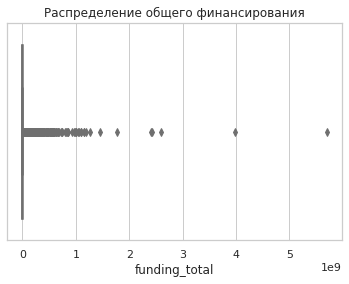

In [99]:
sns.boxplot(data=acquisition_companies_df, x='funding_total',color='skyblue')

plt.title('Распределение общего финансирования')
plt.xticks(rotation=0)
plt.show()

Построим диаграмму размаха («ящик с усами»), при этом отключим выбросы (showfliers=False)

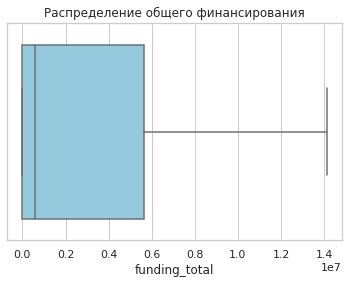

In [100]:
sns.boxplot(data=acquisition_companies_df, x='funding_total',showfliers=False,color='skyblue')

plt.title('Распределение общего финансирования')
plt.xticks(rotation=0)
plt.show()

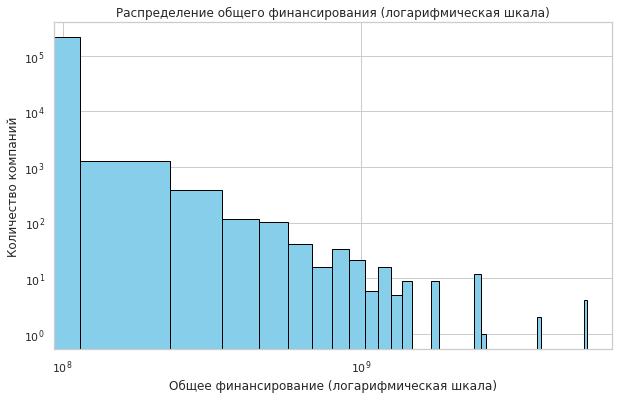

In [101]:
# код ревьюера
   
plt.figure(figsize=(10, 6))
plt.hist(company_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()

Видно,что в данных есть выбросы, примерно после отметки 0,59. В среднем основной диапазон значений общего финансирования лежит в диапазоне 0 до 0,59. Медиана 0,05.
Распределение характеризуется не очень широким разбросом и «хвостом» в правой части гистограммы. Такие высокие значения можно отнести к выбросам. Однако сами значения, не выглядят ошибкой, и такое количество общего финасирования вполне допустимо. Поэтому при анализе данных их оставим.

**Вывод:**
Обычные способы нахождения типичных значений (например, среднее значение) не всегда применимы к данным о финансировании, и вот почему:
- Сильный перекос: Данные о финансировании часто имеют правосторонний перекос: большинство значений сосредоточено в нижнем диапазоне (близко к нулю), но есть несколько очень больших выбросов.В таких случаях среднее значение (mean) может быть сильно искажено выбросами.
- Выбросы:Несколько компаний с очень большим финансированием могут "перетянуть" среднее значение вверх, делая его нерепрезентативным для большинства компаний.
- Медиана как альтернатива:Медиана (50%) менее чувствительна к выбросам и лучше отражает типичное значение. В вашем случае медиана равна 6, что ближе к типичному значению, чем среднее (1,014).
- Квартили:Квартили (25%, 50%, 75%) помогают понять распределение данных и выявить выбросы. Например, если 75% данных меньше 5,650, а максимальное значение равно 57,000, это указывает на наличие выбросов.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

Чтобы исследовать компании, которые были проданы за ноль или за один доллар, но при этом имели ненулевой общий объём финансирования, выполним следующие шаги:

- Фильтрация данных: Отберём компании, у которых funding_total больше нуля.Отберём компании, которые были проданы за ноль или за один доллар.
- Расчёт границ выбросов: Используем межквартильный размах (IQR) для определения верхней и нижней границ выбросов. Определим, каким процентилям соответствуют эти границы.

 Фильтрация данных

In [102]:
# Фильтрация компаний с ненулевым финансированием
no_zero_companies = acquisition_companies_df[acquisition_companies_df['funding_total'] > 0]

# Фильтрация компаний, проданных за ноль или за один доллар
zero_or_one = no_zero_companies[
    (no_zero_companies['price_amount'] == 0) | (no_zero_companies['price_amount'] == 1)
]

# Проверка результата
len(zero_or_one)

1584

Количество компаний, проданных за ноль или за один доллар:1584 компаний

Расчёт границ выбросов
Используем межквартильный размах (IQR) для определения выбросов:

In [103]:
# Расчёт квартилей и IQR
Q1 = zero_or_one['funding_total'].quantile(0.25)
Q3 = zero_or_one['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Определение процентилей для границ
lower_percentile = zero_or_one['funding_total'].le(lower_bound).mean() * 100
upper_percentile = zero_or_one['funding_total'].ge(upper_bound).mean() * 100

# Вывод результатов
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")
print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных")
print(f"Верхняя граница соответствует {100 - upper_percentile:.2f}% данных")

Нижняя граница выбросов: -18100000.0
Верхняя граница выбросов: 35500000.0
Нижняя граница соответствует 0.00% данных
Верхняя граница соответствует 91.16% данных


- Нижняя граница выбросов:
Значения ниже этой границы считаются выбросами.
В нашем случае нижняя грвница - -18100000.0, минимальное значение 0, то эта граница не имеет смысла, так как финансировнаие не может быть отрицательным.
- Верхняя граница выбросов:
Значения выше этой границы считаются выбросами.
В нашем случае верхняя граница равно 35500000, компании с финансированием больше 35500000 считаются выбросами.
- Процентили:
Нижняя граница соответствует процентилю данных 0%.
Верхняя граница соответствует определённому процентилю данных - 91%. т.е. 91.16% данных находятся ниже верхней границы, а 8.84% данных — это выбросы.

Построим boxplot для визуализации выбросов:

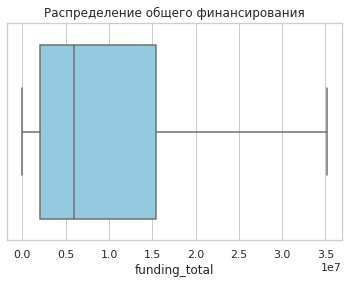

In [104]:
sns.boxplot(data=zero_or_one, x='funding_total',showfliers=False,color='skyblue')

plt.title('Распределение общего финансирования')
plt.xticks(rotation=0)
plt.show()

Видно,что в данных есть выбросы, примерно после отметки 3,5. В среднем основной диапазон значений общего финансирования лежит в диапазоне 0,1 до 1,5. Медиана 0,6. Распределение характеризуется не очень широким разбросом и «хвостом» в правой и левой части гистограммы. Такие высокие значения можно отнести к выбросам. Однако сами значения, не выглядят ошибкой, и такое количество общего финасирования вполне допустимо. Поэтому при анализе данных их оставим.

**Вывод:**
- Нижняя граница (-18,100,000) не имеет смысла, так как финансирование не может быть отрицательным.
- Верхняя граница (35,500,000) полезна для идентификации выбросов.
- 91.16% данных находятся ниже верхней границы, а 8.84% данных — это выбросы.    


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Анализ типично высоких цен:
Для каждой категории рассчитаем медиану цены покупки (price_amount). Медиана лучше отражает типичное значение, чем среднее, так как она менее чувствительна к выбросам.

In [105]:
# Медиана цен по категориям
median_prices=acquisition_companies_df.groupby('category_code')['price_amount'].median().sort_values(ascending=False)
median_prices

category_code
nanotech            584000000.0
manufacturing        72000000.0
real_estate          50000000.0
automotive           43000000.0
biotech              13200000.0
hospitality          12500000.0
finance                600000.0
news                        0.0
nonprofit                   0.0
other                       0.0
photo_video                 0.0
public_relations            0.0
advertising                 0.0
search                      0.0
security                    0.0
semiconductor               0.0
social                      0.0
software                    0.0
sports                      0.0
transportation              0.0
travel                      0.0
network_hosting             0.0
messaging                   0.0
music                       0.0
fashion                     0.0
cleantech                   0.0
consulting                  0.0
design                      0.0
ecommerce                   0.0
education                   0.0
enterprise                

Так как данных не много, выделим топ-5 компаний с типично высокими ценами покупки.

In [106]:
# выведем топ-5 компаний с высокими ценами покупки
top_prices= median_prices.iloc[0:5]
top_prices

category_code
nanotech         584000000.0
manufacturing     72000000.0
real_estate       50000000.0
automotive        43000000.0
biotech           13200000.0
Name: price_amount, dtype: float64

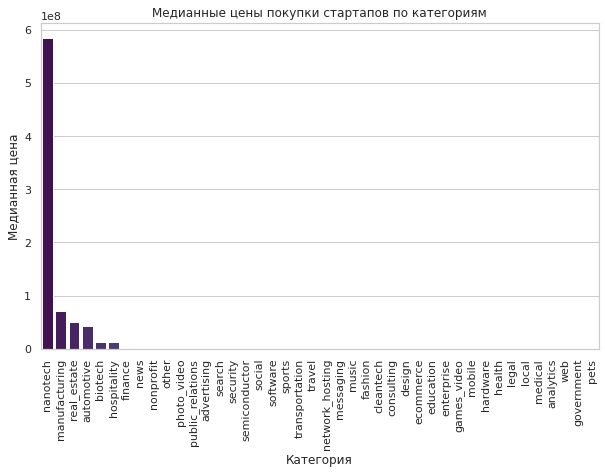

In [107]:
# График медианных цен
plt.figure(figsize=(10, 6))
sns.barplot(x=median_prices.index, y=median_prices.values, palette='viridis')
plt.title('Медианные цены покупки стартапов по категориям')
plt.xlabel('Категория')
plt.ylabel('Медианная цена')
plt.xticks(rotation=90)
plt.show()

В топ-5 вошли категории компаний: nanotech, manufacturing, real_estate, automotive,biotech

Анализ разброса цен:
Для каждой категории рассчитаем разброс цен, используя межквартильный размах (IQR). IQR показывает, насколько данные отклоняются от медианы.

In [108]:
# Расчёт IQR по категориям
Q1 = acquisition_companies_df.groupby('category_code')['price_amount'].quantile(0.25)
Q3 = acquisition_companies_df.groupby('category_code')['price_amount'].quantile(0.75)
IQR = Q3 - Q1
# сортируем данные
IQR=IQR.sort_values(ascending=False)
IQR

category_code
automotive          2.400000e+09
real_estate         9.035000e+08
manufacturing       6.150000e+08
sports              2.600000e+08
biotech             2.500000e+08
finance             1.707500e+08
transportation      1.250000e+08
hospitality         1.187500e+08
health              9.750000e+07
semiconductor       7.500000e+07
cleantech           6.300000e+07
fashion             4.875000e+07
photo_video         4.250000e+07
hardware            3.000000e+07
news                2.800000e+07
network_hosting     2.500000e+07
public_relations    1.700000e+07
security            9.200000e+06
local               8.070100e+06
medical             5.375000e+06
enterprise          5.240000e+06
software            4.947500e+06
mobile              4.900000e+06
advertising         3.000000e+06
search              2.200000e+06
web                 1.000000e+06
other               3.850000e+05
games_video         1.000000e+03
nonprofit           0.000000e+00
nanotech            0.000000e

Так как данных не очень много, топ-5 будет достаточно, что бы не перегружать анализ и предоставить инвесторам более привлекательные компании

In [109]:
# выведем топ-5 компаний с наибольшим разбросом цен
top_iqr= IQR.iloc[0:5]
top_iqr

category_code
automotive       2.400000e+09
real_estate      9.035000e+08
manufacturing    6.150000e+08
sports           2.600000e+08
biotech          2.500000e+08
Name: price_amount, dtype: float64

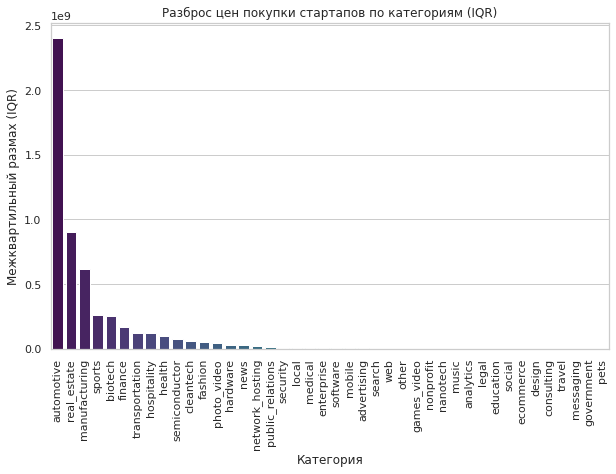

In [110]:
# График разброса цен (IQR)
plt.figure(figsize=(10, 6))
sns.barplot(x=IQR.index, y=IQR.values, palette='viridis')
plt.title('Разброс цен покупки стартапов по категориям (IQR)')
plt.xlabel('Категория')
plt.ylabel('Межквартильный размах (IQR)')
plt.xticks(rotation=90)
plt.show()

В топ-5 вошли категории: automotive,real_estate,manufacturing,sports,biotech.

**Вывод:**

- Решили выделить топ-5 компаний по высоким ценам и большим разбросам цен, так как данных не очен много, что бы не перегружать анализ и предоставить самые привлекательные компании.
- Определили топ-5 компаний с типично высокими ценами, в него вощли категории: nanotech, manufacturing, real_estate, automotive,biotech.
- Определили топ-5 компаний с большим разбросом цен, в него вощли категории: automotive,real_estate,manufacturing,sports,biotech. 
- Построили графики для наглядного представления результатов.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Для каждого статуса стартапа рассчитаем среднее количество раундов финансирования. Используем метод groupby и mean.

In [111]:
# Среднее количество раундов по статусам
average_rounds = acquisition_companies_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)
print("Среднее количество раундов по статусам:")
print(average_rounds)

Среднее количество раундов по статусам:
status
ipo          1.934375
operating    1.522695
closed       1.381453
acquired     0.523526
Name: funding_rounds, dtype: float64


Построим столбчатую диаграмму (barplot), чтобы визуализировать среднее количество раундов финансирования для каждого статуса.

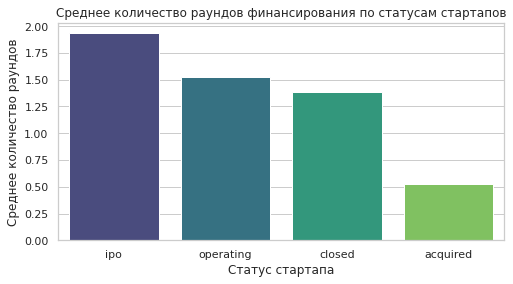

In [112]:
# График среднего количества раундов по статусам
plt.figure(figsize=(8, 4))
sns.barplot(x=average_rounds.index, y=average_rounds.values, palette='viridis')
plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.show()

- Больше всего рандов проходили компании со статусом "ipo" - 1,93.Компании, которые выпустили свои акции на открытом рынке. Это можно сказать вершина развития любой компании.
- Раундов в статусе "operating" - 1,52. Вероятно  это те стартапы,которые продолжают работать, проходят больше рандов финансирования.
- Раундов в статусе "closed" - 1,38. Стартапы, которые закрылись, проходят меньше раундов финансирования.
- Раундов в статусе "acquired" - 0,52. Стартапы, которые были приобретены.

**Вывод:**

Типичное количество раундов:
- Для работающих стартапов и приобретённых стартапов типичное количество раундов финансирования выше, чем для закрытых. 
- Это может быть связано с успешностью стартапов и их способностью привлекать инвестиции.

Рекомендации для заказчика: 
- Стоит обратить внимание на стартапы, которые прошли несколько раундов финансирования, так как они имеют более высокие шансы на успех.
- Стартапы с малым количеством раундов могут быть более рискованными.   


## Шаг 4. Итоговый вывод и рекомендации


В ходе проектной работы было произведено исследование сатрапов, для финансоваой компания, которая хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

В качестве данных было проанализировано 5 таблицы `acquisition.csv`- информация о покупках одними компаниями других компаний, `company_and_rounds.csv` -информация о компаниях и раундах финансирования; `people.csv` -информация о сотрудниках; `education.csv` - информация об образовании сотрудника; `degrees.csv`- информация о типе образования сотрудника.

Исследовательский анализ данных позволил сформировать следующие  выводы:
- Исследовав данные раундов финансирования по годам, видна следующая тенденция, что с течением времени количество раундов финансирования растет и сумма финансирования снижается. Так например, самое маленькое количество раундов финансирования было в 1999 – 76 раундов, тогда как в  2013 году их – 11072. По сумме финансирования, самая большая сумма была в 2005 - 5500000, а к 2013 году она снизилась до 1200000. Рост раундов финансирования, может быть связан с тем, что стартапы проходят больше раундов финансирования из за Увеличение числа инвесторов и фондов, готовых вкладывать в стартапы. Средняя  сумма финансирования в кажом раунде снижаеться, это может указывать на то, что инвесторы стали более осторожными или что стартапы стали привлекать меньшие суммы на ранних этапах. Также это может быть связано с конкуренции среди стартапов, что приводит к снижению оценки компаний. 
- Разделили предприятия по группам, в зависимости от количества человек. Проверили в них процент сотрудников без образования. Получилось следующие группы:  "1"- 36,04% сотрудников без информации об образовании. Колличество компаний в группе - 18 116. В группе "2" - 36,54% сотрудников без информации об образовании. Колличество компаний в группе - 5418. В группе "3"- 37,57% сотрудников без информации об образовании. Колличество компаний в группе - 2985.В группе "4-5"- 39,22% сотрудников без информации об образовании. Колличество компаний в группе - 2763. В группе "6-10"- 41,77% сотрудников без информации об образовании. Колличество компаний в группе - 2664. В группе "11-25"-33,38% сотрудников без информации об образовании. Колличество компаний в группе - 1425. В группе "26+"- 18,66% сотрудников без информации об образовании, колличество компаний в группе - 1243. Поэтому можно сделать вывод, что в группах, по категориям предприятий отсутствует меньше половины информации, это значит,что ее достаточно для анализа. 
- Выяснили,что не стоит обьединять таблицы по столбцу  `network_username` , который встречается в таблицах `people`, `company_and_rounds` . С помощью диаграммы Венна, посмотрели пересеяения между столбцами и выяснили,что данные мало связаны между собой, при их соединении, будет много пропусков. Пересечение между датасетом `people_df` и `company_df`  - 2192 пересечение. Связь между датасетом `people_df` и `fund_df` очень мальнькая 72 пересечения и связь между `company_df` и `fund_df` тоже незгачительная - 63.
- Выяснили,что датасет `company_and_rounds.csv` получен путем слияния двух таблиц с данными о компаниях и с раундами инвистирования. Разделили его на 2 таблицы: `rounds_info` - информация о раундах, `companies_info` - информация о компаниях.Провели обработку таблицы `companies_info`: привели названия стоблбцов к нижнему регистру, удалили 1 строку с пропуском в столбце `company_id`, выявли дубликаты по названию компаний - 47 шт и удалили, что бы не дублировать информацию при анализе. В результате таблице осталось 52928 строк, удалено 48 строк, процент потерь 0,02%.
- Обьединили таблицу `filtered_companiesс` таблицей `сacquisition` (информация о покупках одними компаниями других компаний.В результате получили таблицу `acquisition_companies_df`. Получили список из 40745 компаний, которые меняли или готовы менять поставщика  (`status` указано `acquired`) и получали инвестиции или финансировании  (`funding_rounds` или `investment_rounds` больше нуля), так как эти компании интересны заказчику.
- Провели анализ столбца `funding_total`. Типичный обьем финансирования в диапазоне 0 (25% процентиль)  до 5,6 (75% процентиль). Медиана 6 (50%), это значит, что 50% компаний получили финансирование в размере менее 6,0.
 - Определили топ-5 компаний с типично высокими ценами, в него вощли категории: `nanotech`, `manufacturing`,`real_estate`,  `automotive`, `biotech`. Определили топ-5 компаний с большим разбросом цен, в него вошли категории: `automotive`, `real_estate`, `manufacturing`, `sports`, `biotech`.

В качестве рекомендаций можно сказать:
- Рекомендуем обратить внимание на категории `real_estate`,  `automotive`, `biotech` – они входят в оба списка топ компаний с типично высокими ценами и большим разбросом цен.
- Больше всего рандов проходили компании со статусом "ipo" - 1,93, в статусе "operating" - 1,52. (оторые продолжают работать, проходят больше рандов финансирования),  в статусе "closed" - 1,38 (которые закрылись, проходят меньше раундов финансирования), в статусе "acquired" - 0,52 (которые были приобретены). Рекомендуем обратить внимание на стартапы, которые прошли несколько раундов финансирования, так как они имеют более высокие шансы на успех. Стартапы с малым количеством раундов могут быть более рискованными.
- Также рекомендуем ннализировать стартапы более тщательно, чтобы минимизировать риски. Рассмотреть возможность участия в нескольких раундах финансирования для поддержки перспективных стартапов. Также можно диверсифицировать свои вложения, вкладывая меньшие суммы в большее число стартапов. Это может снизить риски, но также уменьшить потенциальную прибыль. Данная тенденция уменьешния суммы и увеличения количества раундов финансирования, как раз это показывает.
